# Classification Algorithms and Model Evaluation

In this notebook, we will cover:

* Logistic Regression
* Confusion Matrix
* Precision, Recall, Accuracy, F1 Score
* ROC AUC Curve
* Deciding Binary Classifier threshold
* KNN

Importing all necessary packages

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Setting global seed of notebook

In [43]:
np.random.seed(seed=25)

### Task 1: Load Data from 'titanic_clean.csv'

In [44]:
#write code here
data = pd.read_csv('titanic_clean.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


### One Hot encoding for categorical varaibles

In [45]:
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [46]:
df=df_OneHot.copy()

### Task 2: Create Independent and Dependent Variables

In [47]:
#write code here
X = df.drop(['PassengerId','Survived'], axis=1)
Y = df[['Survived']]
print(X.shape)
print(Y.shape)

(891, 30)
(891, 1)


### Task 3: Train Test n Split the data

In [48]:
# Import the library
from sklearn.model_selection import train_test_split

In [49]:
#Write the code here
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623, 1)
(268, 30) (268, 1)


In [50]:
xtrain.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
707,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
246,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
624,1,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
96,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
576,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [51]:
ytrain.head()

,Survived
707,0
246,0
624,1
96,1
576,0


# Logistic Regression

### Creating Model & Training

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr_model = LogisticRegression(random_state=25)

In [54]:
lr_model.fit(xtrain, ytrain)

C:\Users\ali.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ali.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=25, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation 

In [55]:
pred = lr_model.predict(xtest)

In [56]:
pred[0:9]

array([0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

Predicting prabability of **0** and **1**

In [57]:
pred_prb = lr_model.predict_proba(xtest)

In [58]:
pred_prb[0:9,0:9]

array([[0.95460202, 0.04539798],
       [0.92861449, 0.07138551],
       [0.90355787, 0.09644213],
       [0.92861449, 0.07138551],
       [0.92861449, 0.07138551],
       [0.26499671, 0.73500329],
       [0.92861449, 0.07138551],
       [0.17722864, 0.82277136],
       [0.95460202, 0.04539798]])

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [59]:
lr_pred_prb = lr_model.predict_proba(xtest)[:,1]

In [60]:
lr_pred_prb

array([4.53979844e-02, 7.13855050e-02, 9.64421322e-02, 7.13855050e-02,
       7.13855050e-02, 7.35003290e-01, 7.13855050e-02, 8.22771361e-01,
       4.53979844e-02, 7.13855050e-02, 8.98499707e-01, 3.80822835e-01,
       7.13855050e-02, 7.13855050e-02, 4.56256389e-01, 5.73805143e-01,
       2.01629426e-01, 3.90708848e-01, 2.84029360e-01, 8.59025647e-01,
       3.82015303e-01, 5.55934981e-01, 8.96654458e-03, 7.13855050e-02,
       9.37165709e-01, 9.70942001e-01, 1.25333836e-01, 5.15623666e-01,
       3.90708848e-01, 8.05159518e-01, 1.25333836e-01, 7.14219090e-01,
       7.78884997e-01, 4.53979844e-02, 1.50927352e-01, 8.51923454e-01,
       8.23883169e-01, 4.03929685e-01, 1.47145253e-01, 5.29395985e-01,
       6.64844909e-02, 6.76807212e-02, 1.25333836e-01, 6.87679219e-01,
       1.67449566e-01, 7.13855050e-02, 8.75009811e-01, 1.67449566e-01,
       1.10657798e-01, 7.96430246e-01, 3.61620168e-01, 1.25333836e-01,
       7.38784441e-01, 1.28915469e-01, 7.80285422e-01, 8.80300642e-02,
      

### Comparison of Predicted and Actual

In [61]:
xtest.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [62]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head(20)

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+,pred,pred_probability,actual
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.045398,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071386,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.096442,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071386,1
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071386,0
169,0,1,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0.735003,1
189,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071386,0
360,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0.822771,1
691,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.045398,0
335,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071386,0


### Confusion Matrix Play ground

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(ytest, pred)

array([[151,  18],
       [ 29,  70]], dtype=int64)

In [65]:
confusion_matrix(ytest, pred).ravel()

array([151,  18,  29,  70], dtype=int64)

In [66]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix=pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,70,29
Not Survived,18,151


### Accuracy

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8246268656716418


In [69]:
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8246268656716418


### Precision

In [70]:
from sklearn.metrics import precision_score

In [71]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.7954545454545454
Precision for 0: 0.8388888888888889


In [72]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.7954545454545454


### Recall

In [73]:
from sklearn.metrics import recall_score

In [74]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.7070707070707071
Recall for 0: 0.893491124260355


In [75]:
recall_lr = recall_score(ytest,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.7070707070707071


### F1 Score

In [76]:
from sklearn.metrics import f1_score

In [77]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.748663101604278
F1 Score for 0: 0.8653295128939829


In [78]:
f1_lr=f1_score(ytest,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.748663101604278


### Class Distribution in Training Data

In [80]:
ytrain.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

### Classification Report

In [81]:
from sklearn.metrics import classification_report

In [82]:
#get report of precision recall and f1 score
print(classification_report(ytest,pred))
#macro avg 

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       169
           1       0.80      0.71      0.75        99

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [83]:
import helper_confusion_matrix as helper
helper.conf_matrix(ytest,lr_pred_prb)

              pred_Survived  pred_Not Survived
Survived                 70                 29
Not Survived             18                151
Accuracy: 82.463
Precision : 79.545
Recall: 70.707
F1 Score : 74.866
TPR: 70.707  FPR: 10.651


### ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

In [84]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [85]:
tpr, fpr

(0.7070707070707071, 0.10650887573964497)

In [86]:
fpr = 1 - recall_0
tpr, fpr

(0.7070707070707071, 0.10650887573964496)

Defining function to plot ROC AUC Curve

In [91]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [92]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [94]:
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [95]:
auc_lr=roc_auc_score(ytest,lr_pred_prb)
auc_lr

0.8282828282828283

Plotting AUC ROC Curve

In [106]:
tpr,fpr

(array([0.        , 0.01010101, 0.02020202, 0.02020202, 0.05050505,
        0.15151515, 0.19191919, 0.31313131, 0.33333333, 0.36363636,
        0.38383838, 0.39393939, 0.39393939, 0.4040404 , 0.42424242,
        0.44444444, 0.44444444, 0.48484848, 0.50505051, 0.50505051,
        0.53535354, 0.53535354, 0.55555556, 0.56565657, 0.56565657,
        0.58585859, 0.60606061, 0.62626263, 0.62626263, 0.63636364,
        0.64646465, 0.65656566, 0.65656566, 0.67676768, 0.6969697 ,
        0.6969697 , 0.70707071, 0.70707071, 0.71717172, 0.71717172,
        0.72727273, 0.74747475, 0.74747475, 0.75757576, 0.76767677,
        0.76767677, 0.76767677, 0.77777778, 0.77777778, 0.7979798 ,
        0.7979798 , 0.7979798 , 0.7979798 , 0.7979798 , 0.7979798 ,
        0.80808081, 0.80808081, 0.80808081, 0.80808081, 0.80808081,
        0.80808081, 0.80808081, 0.80808081, 0.83838384, 0.84848485,
        0.84848485, 0.85858586, 0.94949495, 0.97979798, 0.97979798,
        0.98989899, 0.98989899, 0.98989899, 1.  

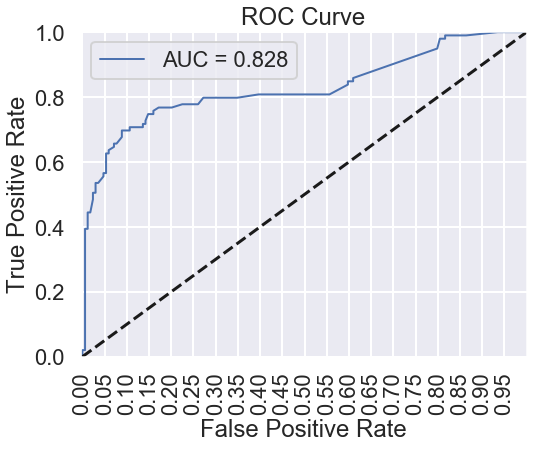

In [96]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

## Model Complexity

In [97]:
from sklearn.preprocessing import PolynomialFeatures
acc_train=[]
acc_test=[]

for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(xtrain),poly_reg.fit_transform(xtest)
    
    lr_poly = LogisticRegression(random_state=25)
    lr_poly.fit(X_tr_poly, ytrain)
   
    y_tr_predicted,y_tst_predict = lr_poly.predict(X_tr_poly),lr_poly.predict(X_tst_poly)
   
    acc_train.append(accuracy_score(ytrain, y_tr_predicted))
    acc_test.append(accuracy_score(ytest, y_tst_predict))
    

C:\Users\ali.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ali.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ali.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ali.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

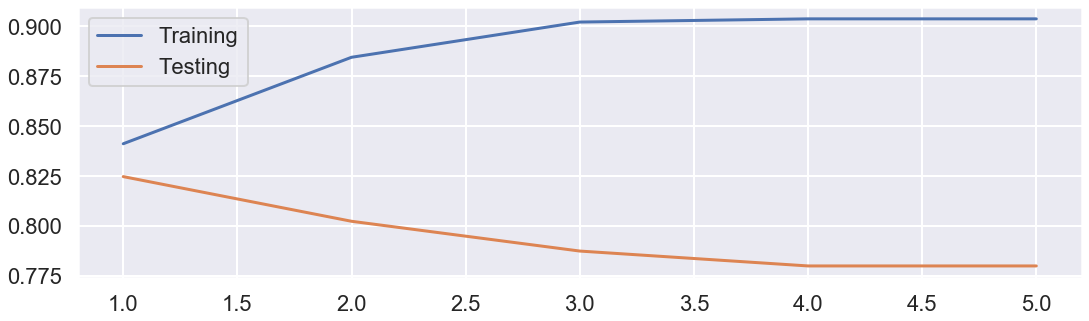

In [98]:
plt.figure(figsize=(18,5))
sns.set_context('poster')

sns.lineplot(x=list(range(1,6)), y=acc_train, label='Training')

sns.lineplot(x=list(range(1,6)), y=acc_test, label='Testing')

# 3. Submission on Kaggle

### Task 4: Import test data

In [110]:
#write code here
test = pd.read_csv('competition_clean.csv')
df_test = test.copy()
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64
3,895,3,male,0,0,S,Mr,solo,0-10,16-32
4,896,3,female,1,1,S,Mrs,group,10-25,16-32


### Task 5: Do One Hot encoding of test data

In [111]:
#write code here
df_OneHot=pd.get_dummies(df_test,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()
df_test = df_OneHot.copy()

### Task 6: Separate Passenger ID for submission

In [115]:
#Write code here
PassengerID = df_test['PassengerId']
df_test.drop('PassengerId', axis=1, inplace=True)

### Task 7: Do prediction through final model

In [117]:
#write code here
pred_final=lr_model.predict(df_test)

#### Creating Data Frame for submission

In [118]:
submission=pd.DataFrame({'PassengerId':PassengerID,'Survived':pred_final})

In [119]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Task 8: Export the dataset into csv file

In [120]:
# Write code here
submission.to_csv('my_submission v1.0.csv', index = False)